# Titanic Survival Prediction 

![titanic](titanic.jpg)


**Author Name:** Talha Aslam

**Email:** ranatalha30055@gmail.com

**Github:** [Github](https://github.com/TalhaAslam44)

**LinkedIn:** [LinkedIn](https://www.linkedin.com/in/talha-aslam-2693661b7/)

#  About the Dataset

## Description: 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Acknowledgements:

This dataset has been downloaded from kaggle from followinf [link](https://www.kaggle.com/datasets/yasserh/titanic-dataset)




## Objective:

- Understand the Dataset & cleanup (if required).
- Build a strong classification model to predict whether the passenger survives or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


# Importing the liberaries

In [1]:
import pandas as pd # for computation and analysis of data
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization also
import warnings
warnings.filterwarnings('ignore')

# Importing Machine learning liberaries


In [2]:
# Importing Machine learning liberaries
from sklearn.preprocessing import LabelEncoder # for converting categorical data into numeric
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # evaluation metrics

# Data Loading 

>  Load the csv file with the pandas.

> creating the dataframe and understanding the data present in the dataset using pandas.

> Dealing with the missing data, outliers and the incorrect records.
    

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
# Lets see how data looks like
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# for more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### Observation

- The Dataset contains 891 Rows and 12 columns.
- The Dataset also have missing values in it.
- The Dataset has 2 float, 5 object and 5 int data type columns in it.
- We can see the column names and each data type of that column.

In [7]:
# to check shape
df.shape

(891, 12)

# Dealing with Missing Values

In [8]:
# Let's see missing values in the dataset
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
# Let's see the percentage of missing values in the dataset upto 2 decimal points
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

---
### Observations


- Cabin Column contain 77.10% missing values.
- Age Column contains 19.87% of the missing values.
- Embarked contains 0.22% of missing values.

<Axes: >

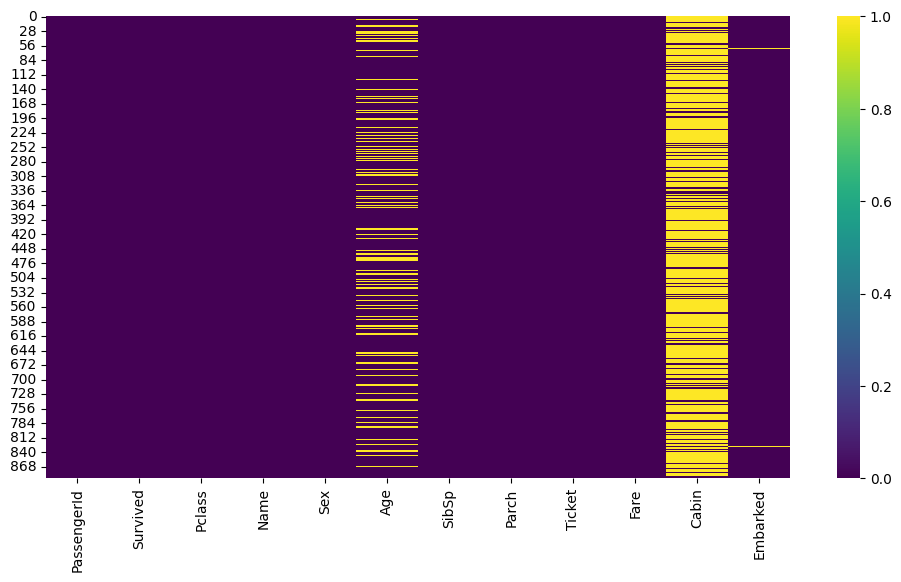

In [10]:
# Let's see missing values in a plot
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = True)

- In above heatmap yellow lines indicate the missing values present corresponding to each column.

In [11]:
# Let's remove Cabin Column because it has 77.10% missing values
df.drop(['Cabin'], axis = 1, inplace = True)

In [13]:
#  checking remaining missing values
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [14]:
# Now, let's fill the missing values in the Age Column with median 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df.isnull().sum().sort_values(ascending = False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [16]:
# Since Embarked is categorical column so fill this column with mode value
df.fillna(df['Embarked'].mode()[0], inplace = True)

In [17]:
df.isnull().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

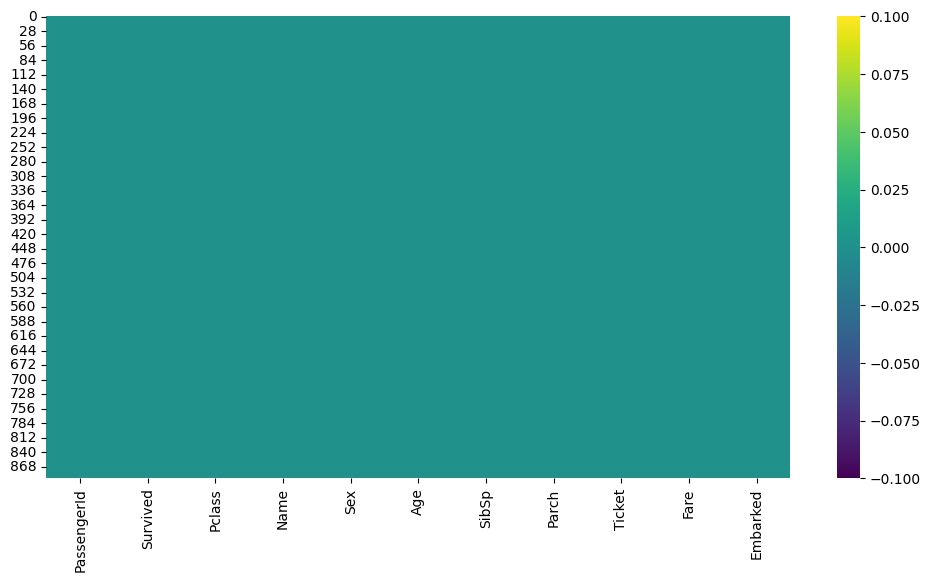

In [18]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = True)

---
- So now we Dont have any missing values left in our dataset

### Observations

- We dont have any duplicate rows in our dataset.

# Visualizing the survival of passengers

In [19]:
# Insights from the data
df.sample(3) # takes any random 3 rows from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,S
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,C


In [20]:

# Let's see how many passengers survived 
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
# Let's see how many perecnt passengers survived 
df['Survived'].value_counts() / len(df) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

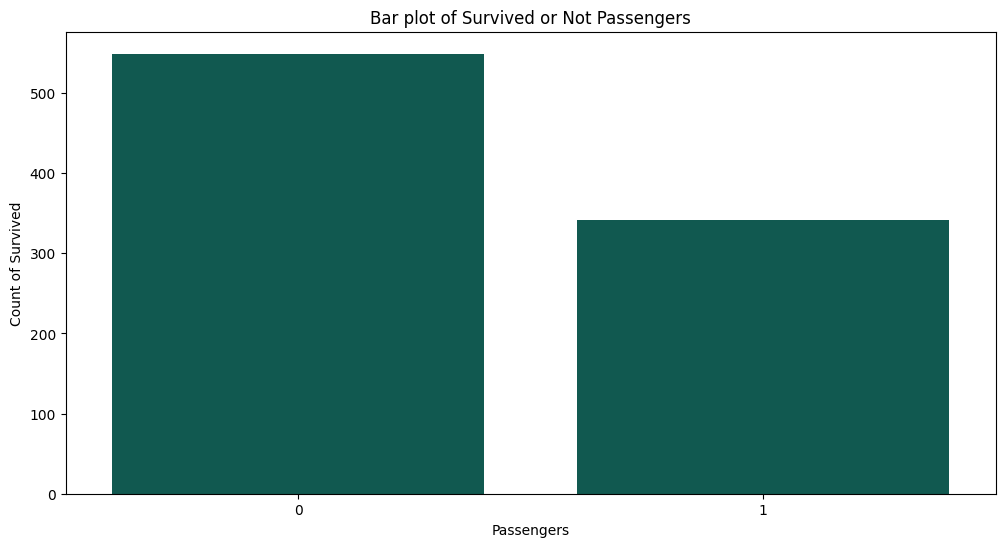

In [22]:
plt.figure(figsize = (12, 6))
sns.barplot(df['Survived'].value_counts(), color='#056559')
plt.xlabel('Passengers')
plt.ylabel('Count of Survived')
plt.title('Bar plot of Survived or Not Passengers')
plt.show()

---
### Observations

- 61.6% passengers Not survived.
- 38.4% passengers only survived in the titanic.

In [23]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,28.0,1,0,19996,52.000,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.100,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.000,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C


In [25]:
# Let's see the percentage of male and female in survived column
round(df.groupby('Sex')['Survived'].value_counts() / len(df) * 100, 2)

Sex     Survived
female  1           26.15
        0            9.09
male    0           52.53
        1           12.23
Name: count, dtype: float64

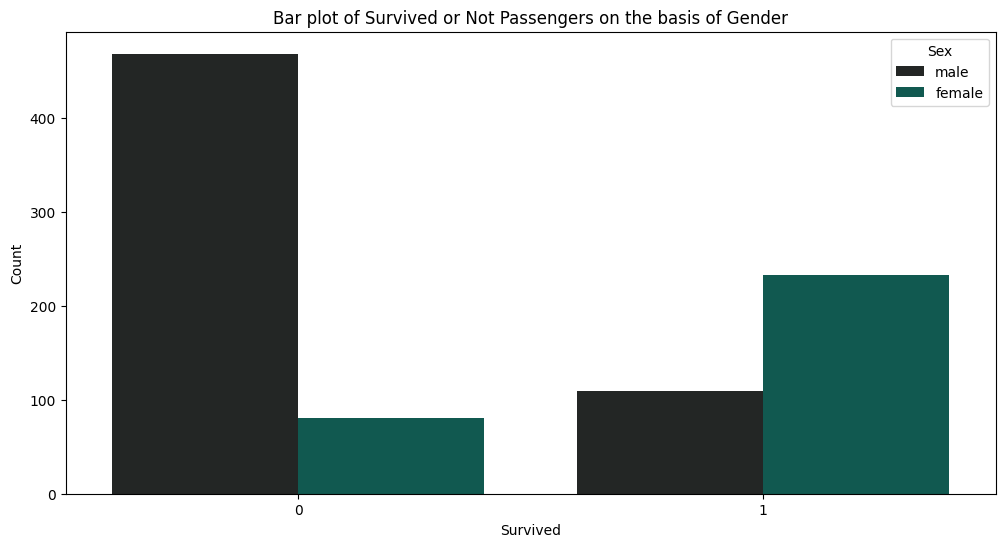

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Sex',color='#056559', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived or Not Passengers on the basis of Gender')
plt.show()

---
### Observations

- 26.15% female and 12.23% male survived.
- 52.53% female and 9.89% male did not survive.

In [28]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,S
388,389,0,3,"Sadlier, Mr. Matthew",male,28.0,0,0,367655,7.7292,Q
128,129,1,3,"Peter, Miss. Anna",female,28.0,1,1,2668,22.3583,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,S


In [29]:
# Lets check all the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
# Let's see the correlation of survived, pclass, age, sibsp, parch and fare
df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


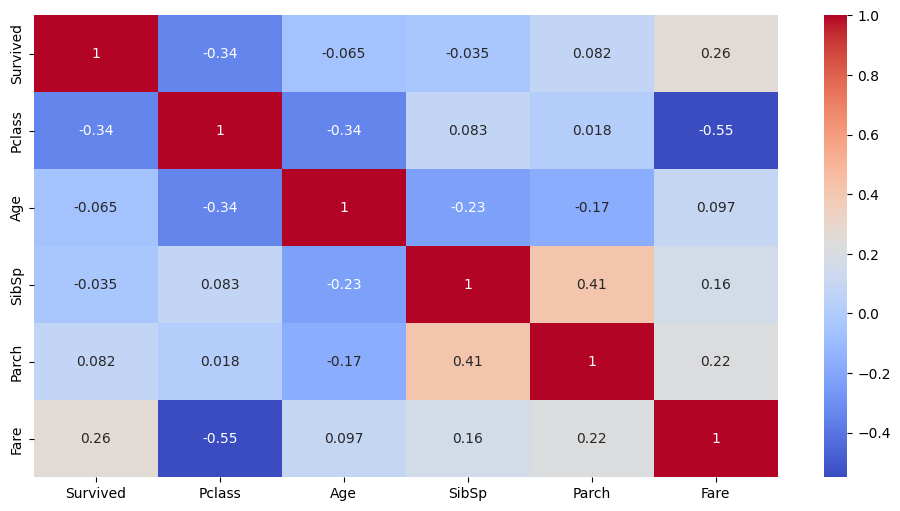

In [32]:
plt.figure(figsize = (12, 6))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].corr(), annot = True, cbar = True, cmap = 'coolwarm')
plt.show()

In [33]:
# Let's check survival rate on pclass
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

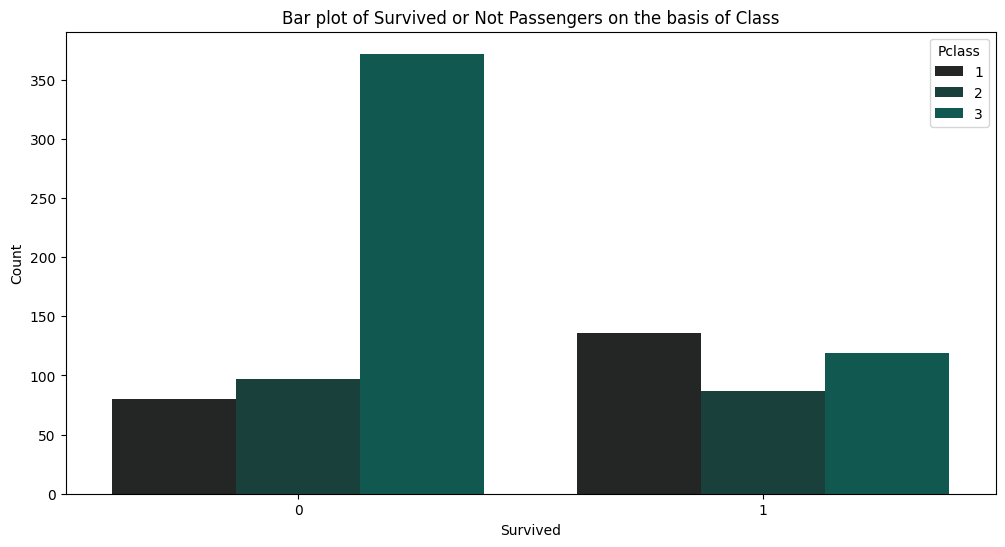

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Survived', hue = 'Pclass',color='#056559', data = df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived or Not Passengers on the basis of Class')
plt.show()

In [35]:
df.tail() # shows the last 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


# Builidng The Model

### We have to make the model that predicts the `survival` on the basis of `pclass, sex, age, sibsp, parch, fare` and `embarked`

In [37]:
# Let'd drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [41]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.value_counts()

Survived  Pclass  Sex     Age   SibSp  Parch  Fare     Embarked
0         3       male    28.0  0      0      7.8958   S           15
                                              8.0500   S           12
                                              7.7500   Q            9
1         3       female  28.0  0      0      7.7500   Q            7
0         2       male    28.0  0      0      0.0000   S            6
                                                                   ..
          3       male    18.0  1      1      20.2125  S            1
                          19.0  0      0      0.0000   S            1
                                              6.7500   Q            1
                                              7.6500   S            1
1         3       male    45.0  0      0      8.0500   S            1
Name: count, Length: 775, dtype: int64

In [43]:
# Let's encode the object type columns into numerical dtype uisng for loop
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [46]:
# Choose features (X) and labels (y)
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [47]:
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [48]:
# call the model
model = LogisticRegression()

In [49]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# predict the model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [51]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Classification Report:\n {class_report}")

Accuracy Score: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



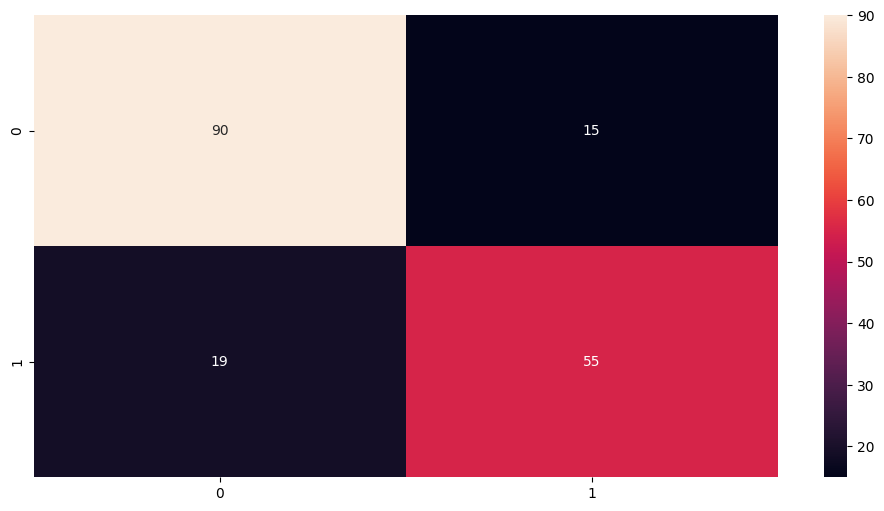

In [52]:
# Let's check heatmap of confusion matrix
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

# Saving and loading the model


In [53]:
import pickle
pickle.dump(model, open('titanic_model.pkl', 'wb'))

In [54]:
# Let's load 
pickle.load(open('titanic_model.pkl', 'rb'))

LogisticRegression()

In [55]:
model.predict([[1, 0, 27, 2, 0, 45, 2]])

array([1], dtype=int64)

---
- According to the given features the passenger survived in titanic.